# Certificate in AI 2.0: Machine Learning
# Lab 01: Linear Regression Fundamentals

## Introduction

In this lab, we'll implement linear regression from scratch to reinforce the concepts covered in the lectures. 

## Part 1: Basic Setup

First, let's import the necessary libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Part 2: Small Dataset Exploration

Let's start with a tiny dataset of just 5 points to clearly see how linear regression works:

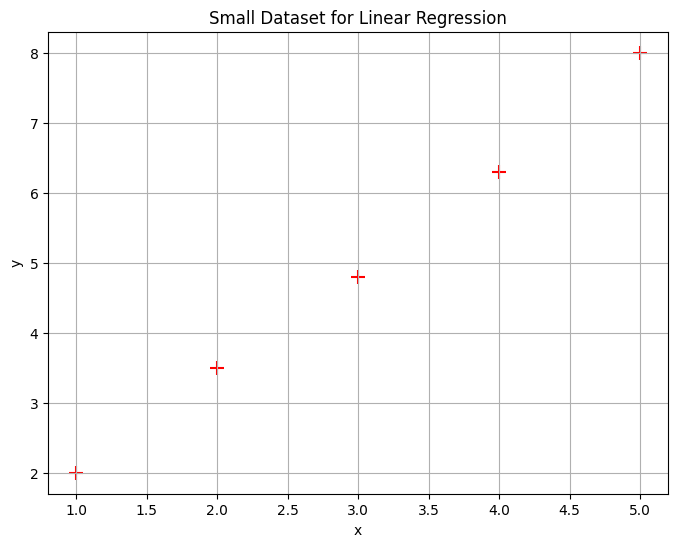

Number of training examples (m): 5
X shape: (5, 1)
y shape: (5, 1)


In [14]:
# Small dataset with 5 points
X_small = np.array([1, 2, 3, 4, 5])
y_small = np.array([2, 3.5, 4.8, 6.3, 8])

# Reshape to match the expected dimensions
X_small = X_small.reshape(-1, 1)
y_small = y_small.reshape(-1, 1)

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X_small, y_small, color='red', marker='+', s=100)
plt.title('Small Dataset for Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

print(f"Number of training examples (m): {len(X_small)}")
print(f"X shape: {X_small.shape}")
print(f"y shape: {y_small.shape}")

### Exercise 1:
1. Looking at the data points, visually estimate what the best-fit line might be. What might be the approximate slope (w₁) and y-intercept (w₀)?
2. Using your visual estimate of w₀ and w₁, predict the y-value for x = 3.5. How confident are you in this prediction?

In [ ]:
# Exercise 1: Solution
# m = 6/5
# c = 1.7
# y = m*X_small + c




## Part 3: Implementing the Prediction Function

In linear regression, we're trying to find a line of the form:
$$\hat{y} = w_0 + w_1 x$$

Let's implement this prediction function:

In [26]:
def predict(X, w):
    # Add a column of ones to X to handle the intercept term w₀
    # ones = 
    X_b = np.c_[np.ones((X.shape[0],1)),X]
    return X_b.dot(w)

Let's test our prediction function with initial weight values:

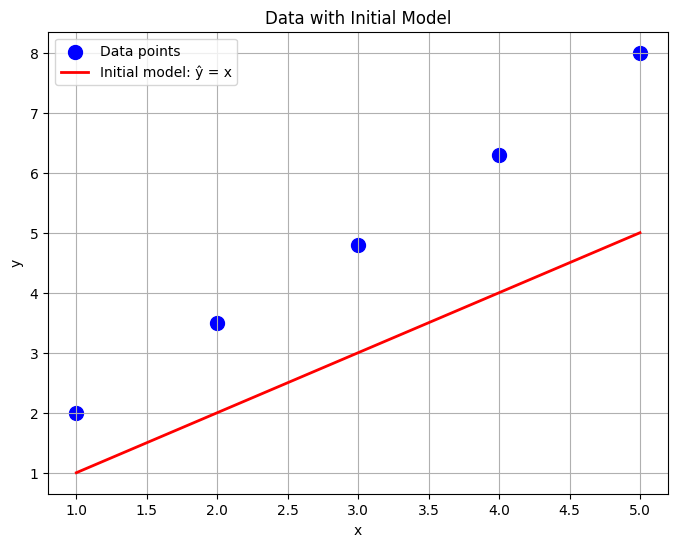

Initial predictions:
For x = 1, ŷ = 1.00, actual y = 2.0
For x = 2, ŷ = 2.00, actual y = 3.5
For x = 3, ŷ = 3.00, actual y = 4.8
For x = 4, ŷ = 4.00, actual y = 6.3
For x = 5, ŷ = 5.00, actual y = 8.0


In [27]:
# Initialize w with some values
w_initial = np.array([[0], [1]])  # [w₀, w₁] = [0, 1]

# Calculate initial predictions
predictions = predict(X_small,w_initial)

# Plot the data and initial prediction line
plt.figure(figsize=(8, 6))
plt.scatter(X_small, y_small, color='blue', marker='o', s=100, label='Data points')

# Plot the prediction line
x_line = np.array([[1], [5]])
x_line_b = np.c_[np.ones((2, 1)), x_line]
y_line = x_line_b.dot(w_initial)
plt.plot(x_line, y_line, 'r-', linewidth=2, label='Initial model: ŷ = x')

plt.title('Data with Initial Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print("Initial predictions:")
for i in range(len(X_small)):
    print(f"For x = {X_small[i][0]}, ŷ = {predictions[i][0]:.2f}, actual y = {y_small[i][0]}")

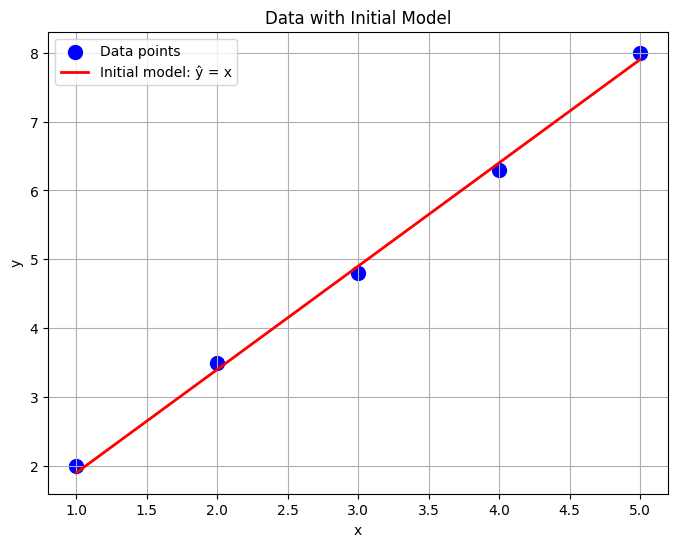

Initial predictions:
For x = 1, ŷ = 1.90, actual y = 2.0
For x = 2, ŷ = 3.40, actual y = 3.5
For x = 3, ŷ = 4.90, actual y = 4.8
For x = 4, ŷ = 6.40, actual y = 6.3
For x = 5, ŷ = 7.90, actual y = 8.0
Sum of sq Errors is: 0.05000000000000017
MSE is :  0.010000000000000035


In [38]:
# Initialize w with some values
w_initial = np.array([[0.4], [1.5]])  # [w₀, w₁] = [0, 1]

# Calculate initial predictions
predictions = predict(X_small,w_initial)

errors = predictions - y_small
s = np.sum(errors**2)
MSE = (1/len(y_small))*s
# Plot the data and initial prediction line
plt.figure(figsize=(8, 6))
plt.scatter(X_small, y_small, color='blue', marker='o', s=100, label='Data points')

# Plot the prediction line
x_line = np.array([[1], [5]])
x_line_b = np.c_[np.ones((2, 1)), x_line]
y_line = x_line_b.dot(w_initial)
plt.plot(x_line, y_line, 'r-', linewidth=2, label='Initial model: ŷ = x')

plt.title('Data with Initial Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print("Initial predictions:")
for i in range(len(X_small)):
    print(f"For x = {X_small[i][0]}, ŷ = {predictions[i][0]:.2f}, actual y = {y_small[i][0]}")

print('Sum of sq Errors is:',s)
print('MSE is : ',MSE)

### Exercise 2:
1. Try different values for w₀ and w₁ to see how the line changes.
2. Set w₀ = 0.5 and w₁ = 1.5 and calculate the predictions for each x-value in the dataset.
3. Calculate the error (y - ŷ) for each prediction and compute the sum of squared errors. How does this compare to the initial model?
4. Find values of w₀ and w₁ that visually fit the data better than both the initial values and those in question 2.


In [ ]:
# Exercise 2: Solution



## Part 4: Implementing the Cost Function

The cost function measures how well our model fits the data. We'll use the Mean Squared Error:

$$J(w) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2$$

Let's implement this:

In [42]:
def compute_cost(X, y, w):
    p = predict(X,w)

    errors = p - y
    s = np.sum(errors**2)
    m = len(y)
    j = s/(2*m)
    
    return j

Let's compute the cost for our initial weight values:

In [ ]:
initial_cost = compute_cost(X_small, y_small, w_initial)
print(f"Cost with w₀ = {w_initial[0][0]}, w₁ = {w_initial[1][0]}: {initial_cost:.4f}")

Cost with w₀ = 0.4, w₁ = 1.5: 0.0050


### Exercise 3:
1. Calculate the cost for the following weight combinations:
   - w₀ = 0, w₁ = 1
   - w₀ = 0.5, w₁ = 1.5
   - w₀ = 1, w₁ = 1.5
   - w₀ = 0.8, w₁ = 1.4
2. Which combination gives the lowest cost so far?


In [49]:
w_1 = np.array([[0],[1]])
print(f"Cost with w₀ = {0}, w₁ = {1}: {compute_cost(X_small, y_small, w_1):.4f}")

w_2 = np.array([[0.5],[1.5]])
print(f"Cost with w₀ = {0.5}, w₁ = {1.5}: {compute_cost(X_small, y_small, w_2):.4f}")

w_3 = np.array([[1],[1.5]])
print(f"Cost with w₀ = {1}, w₁ = {1.5}: {compute_cost(X_small, y_small, w_3):.4f}")

w_4 = np.array([[0.8],[1.4]])
print(f"Cost with w₀ = {0.8}, w₁ = {1.4}: {compute_cost(X_small, y_small, w_4):.4f}")

Cost with w₀ = 0, w₁ = 1: 2.0780
Cost with w₀ = 0.5, w₁ = 1.5: 0.0080
Cost with w₀ = 1, w₁ = 1.5: 0.1730
Cost with w₀ = 0.8, w₁ = 1.4: 0.0140



## Part 5: Visualizing the Cost Function

To better understand the cost function, let's visualize it for different values of w₀ and w₁:

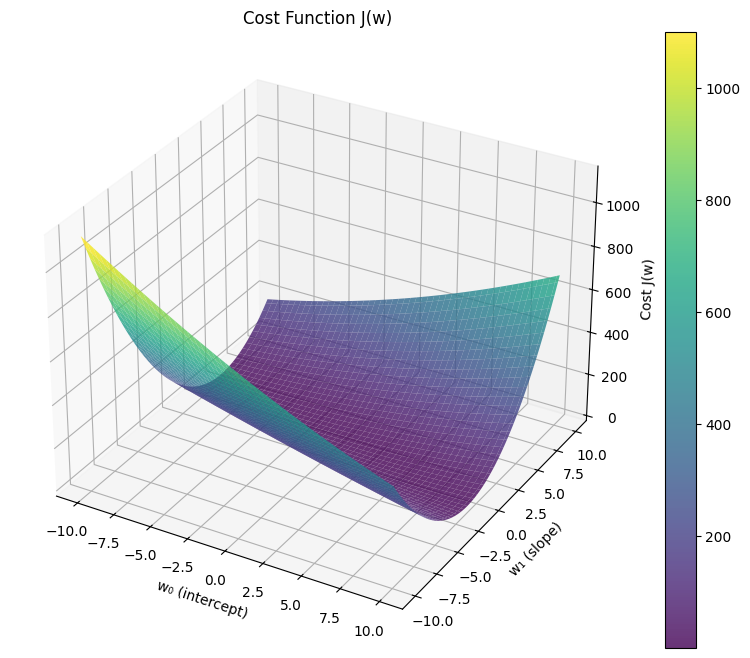

In [61]:
# Create a grid of w values
w0_vals = np.linspace(-10,10 , 100)
w1_vals = np.linspace(-10, 10, 100)

# Initialize cost values for each w combination
J_vals = np.zeros((len(w0_vals), len(w1_vals)))

# Calculate cost for each w combination
for i, w0 in enumerate(w0_vals):
    for j, w1 in enumerate(w1_vals):
        w = np.array([[w0], [w1]])
        J_vals[i, j] = compute_cost(X_small,y_small,w)

# Create a meshgrid for 3D plotting
w0_mesh, w1_mesh = np.meshgrid(w0_vals, w1_vals)

# Create 3D surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(w0_mesh, w1_mesh, J_vals.T, cmap='viridis', alpha=0.8)
ax.set_xlabel('w₀ (intercept)')
ax.set_ylabel('w₁ (slope)')
ax.set_zlabel('Cost J(w)')
ax.set_title('Cost Function J(w)')
fig.colorbar(surf)
plt.show()

### Exercise 4:
1. Using the 3D surface plot, describe the shape of the cost function by changing scale for weights i.e. $w_0=-10$ to $20$ etc. 


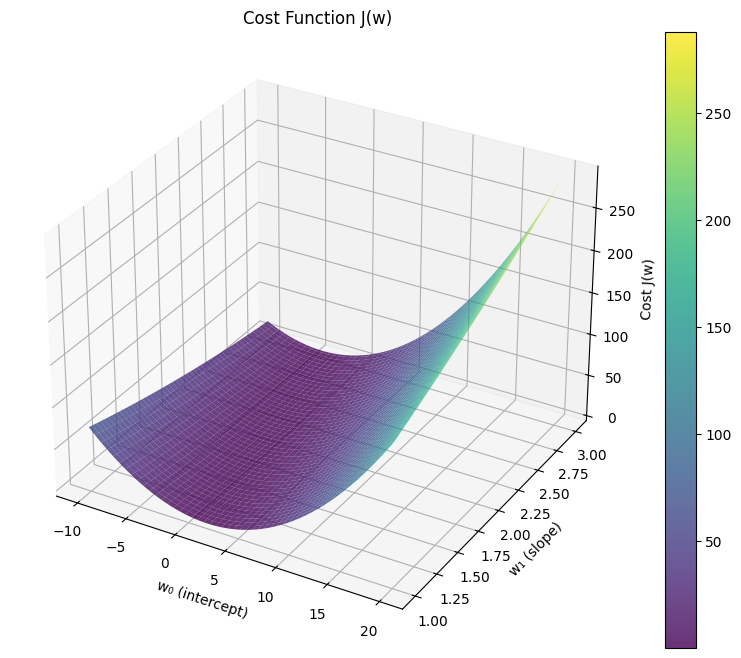

In [62]:
# Exercise 4: Solution
# Create a grid of w values
w0_vals = np.linspace(-10,20 , 100)
w1_vals = np.linspace(1, 3, 100)

# Initialize cost values for each w combination
J_vals = np.zeros((len(w0_vals), len(w1_vals)))

# Calculate cost for each w combination
for i, w0 in enumerate(w0_vals):
    for j, w1 in enumerate(w1_vals):
        w = np.array([[w0], [w1]])
        J_vals[i, j] = compute_cost(X_small,y_small,w)

# Create a meshgrid for 3D plotting
w0_mesh, w1_mesh = np.meshgrid(w0_vals, w1_vals)

# Create 3D surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(w0_mesh, w1_mesh, J_vals.T, cmap='viridis', alpha=0.8)
ax.set_xlabel('w₀ (intercept)')
ax.set_ylabel('w₁ (slope)')
ax.set_zlabel('Cost J(w)')
ax.set_title('Cost Function J(w)')
fig.colorbar(surf)
plt.show()



## Part 6: Implementing Gradient Descent

Now let's implement gradient descent to find the optimal values of w. Remember, the gradient descent update rule is:

$$w_j := w_j - \alpha \frac{\partial}{\partial w_j} J(w)$$

Where the partial derivatives are:

$$\frac{\partial}{\partial w_0} J(w) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})$$

$$\frac{\partial}{\partial w_1} J(w) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}) \cdot x^{(i)}$$

Let's implement this:

In [63]:
def gradient_descent(X, y, w, alpha, iterations):
    
    m = len(y)
    cost_history = []
    w_history = []
    
    for i in range(iterations):
        # Add column of ones to X (for w₀)
        X_b = np.c_[np.ones((X.shape[0],1)),X]
        
        # Calculate predictions
        predictions = X_b.dot(w)
        
        # Calculate errors
        
        errors = predictions - y
        # Calculate gradients

        grad = (1/m)*(X_b.T.dot(errors))
        
        # Update weights
        w = w - alpha * grad
        
        # Store cost and w history
        
        cost = compute_cost(X,y,w)
        cost_history.append(cost)
        w_history.append(w)
        
        # Print progress occasionally
        if i % 100 == 0 or i == iterations - 1:
            print(f"Iteration {i}: Cost = {cost:.6f}, w₀ = {w[0, 0]:.6f}, w₁ = {w[1, 0]:.6f}")
    
    return w, cost_history, w_history

Now let's run gradient descent on our small dataset:

In [ ]:
# Initialize weights
w_init = np.zeros((2, 1))

# Set hyperparameters
alpha = 0.01
iterations = 1000

# Run gradient descent
w_final, cost_history, w_history = gradient_descent(X_small,y_small,w_init,alpha,iterations)

print("\nFinal values after gradient descent:")
print(f"w₀ (intercept) = {w_final[0, 0]:.6f}")
print(f"w₁ (slope) = {w_final[1, 0]:.6f}")
print(f"Final cost = {cost_history[-1]:.6f}")

Iteration 0: Cost = 11.116016, w₀ = 0.049200, w₁ = 0.177200
Iteration 100: Cost = 0.004674, w₀ = 0.425149, w₁ = 1.495188
Iteration 200: Cost = 0.004595, w₀ = 0.433688, w₁ = 1.492828
Iteration 300: Cost = 0.004539, w₀ = 0.440896, w₁ = 1.490831
Iteration 400: Cost = 0.004499, w₀ = 0.446983, w₁ = 1.489145
Iteration 500: Cost = 0.004471, w₀ = 0.452122, w₁ = 1.487722
Iteration 600: Cost = 0.004450, w₀ = 0.456461, w₁ = 1.486520
Iteration 700: Cost = 0.004436, w₀ = 0.460125, w₁ = 1.485505
Iteration 800: Cost = 0.004426, w₀ = 0.463219, w₁ = 1.484648
Iteration 900: Cost = 0.004418, w₀ = 0.465831, w₁ = 1.483925
Iteration 1000: Cost = 0.004413, w₀ = 0.468036, w₁ = 1.483314
Iteration 1100: Cost = 0.004409, w₀ = 0.469898, w₁ = 1.482798
Iteration 1200: Cost = 0.004407, w₀ = 0.471471, w₁ = 1.482362
Iteration 1300: Cost = 0.004405, w₀ = 0.472798, w₁ = 1.481995
Iteration 1400: Cost = 0.004403, w₀ = 0.473919, w₁ = 1.481684
Iteration 1500: Cost = 0.004402, w₀ = 0.474866, w₁ = 1.481422
Iteration 1600: Cos

Let's visualize the convergence of the cost function:

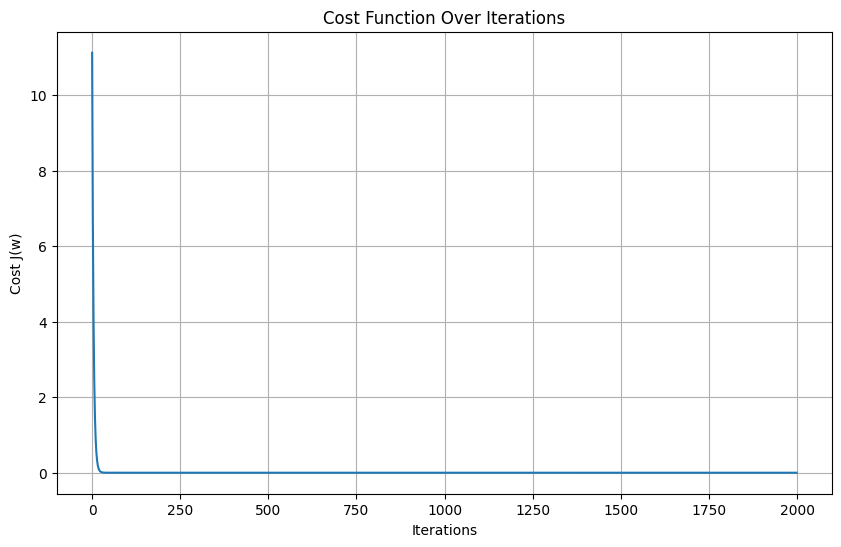

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history)
plt.title('Cost Function Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost J(w)')
plt.grid(True)
plt.show()

Now, let's visualize the final regression line:

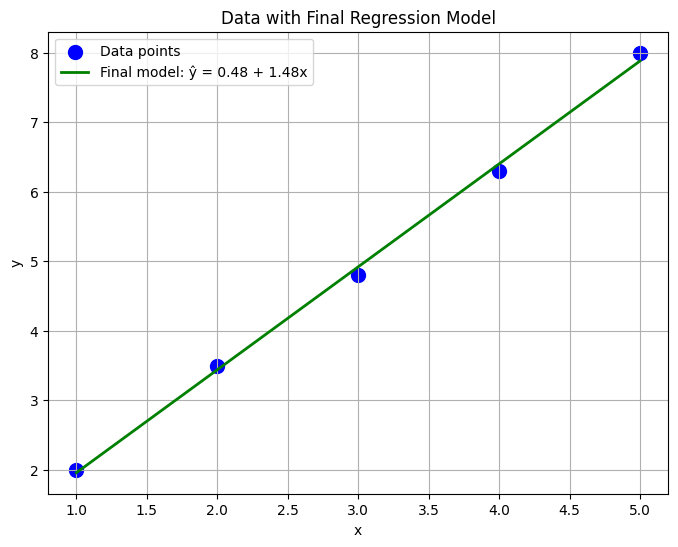

In [68]:
plt.figure(figsize=(8, 6))
plt.scatter(X_small, y_small, color='blue', marker='o', s=100, label='Data points')

# Plot the final model line
x_line = np.array([[1], [5]])
x_line_b = np.c_[np.ones((2, 1)), x_line]
y_line_final = x_line_b.dot(w_final)
plt.plot(x_line, y_line_final, 'g-', linewidth=2, 
         label=f'Final model: ŷ = {w_final[0, 0]:.2f} + {w_final[1, 0]:.2f}x')

plt.title('Data with Final Regression Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

### Exercise 5:
1. Run gradient descent with the following learning rates and record the number of iterations required to converge to within 0.001 of the minimum cost:
   - α = 0.001
   - α = 0.01
   - α = 0.1
   - α = 0.5
2. What happens when you set α = 1.0? Does gradient descent converge? Explain why or why not.
3. Calculate the average rate of decrease in the cost function over the first 100 iterations for each learning rate.


In [74]:
# Initialize weights
w_init = np.zeros((2, 1))

# Set hyperparameters
alpha = 0.001
iterations = 1000

# Run gradient descent
w_final, cost_history, w_history = gradient_descent(X_small,y_small,w_init,alpha,iterations)

print("\nFinal values after gradient descent:")
print(f"w₀ (intercept) = {w_final[0, 0]:.6f}")
print(f"w₁ (slope) = {w_final[1, 0]:.6f}")
print(f"Final cost = {cost_history[-1]:.6f}")

Iteration 0: Cost = 13.961796, w₀ = 0.004920, w₁ = 0.017720
Iteration 100: Cost = 1.296116, w₀ = 0.291312, w₁ = 1.047447
Iteration 200: Cost = 0.124239, w₀ = 0.379166, w₁ = 1.360460
Iteration 300: Cost = 0.015803, w₀ = 0.406618, w₁ = 1.455469
Iteration 400: Cost = 0.005759, w₀ = 0.415684, w₁ = 1.484170
Iteration 500: Cost = 0.004820, w₀ = 0.419146, w₁ = 1.492705
Iteration 600: Cost = 0.004723, w₀ = 0.420891, w₁ = 1.495110
Iteration 700: Cost = 0.004705, w₀ = 0.422102, w₁ = 1.495653
Iteration 800: Cost = 0.004694, w₀ = 0.423140, w₁ = 1.495633
Iteration 900: Cost = 0.004684, w₀ = 0.424113, w₁ = 1.495444
Iteration 999: Cost = 0.004675, w₀ = 0.425047, w₁ = 1.495210

Final values after gradient descent:
w₀ (intercept) = 0.425047
w₁ (slope) = 1.495210
Final cost = 0.004675


In [73]:
# Initialize weights
w_init = np.zeros((2, 1))

# Set hyperparameters
alpha = 0.01
iterations = 1000

# Run gradient descent
w_final, cost_history, w_history = gradient_descent(X_small,y_small,w_init,alpha,iterations)

print("\nFinal values after gradient descent:")
print(f"w₀ (intercept) = {w_final[0, 0]:.6f}")
print(f"w₁ (slope) = {w_final[1, 0]:.6f}")
print(f"Final cost = {cost_history[-1]:.6f}")

Iteration 0: Cost = 11.116016, w₀ = 0.049200, w₁ = 0.177200
Iteration 100: Cost = 0.004674, w₀ = 0.425149, w₁ = 1.495188
Iteration 200: Cost = 0.004595, w₀ = 0.433688, w₁ = 1.492828
Iteration 300: Cost = 0.004539, w₀ = 0.440896, w₁ = 1.490831
Iteration 400: Cost = 0.004499, w₀ = 0.446983, w₁ = 1.489145
Iteration 500: Cost = 0.004471, w₀ = 0.452122, w₁ = 1.487722
Iteration 600: Cost = 0.004450, w₀ = 0.456461, w₁ = 1.486520
Iteration 700: Cost = 0.004436, w₀ = 0.460125, w₁ = 1.485505
Iteration 800: Cost = 0.004426, w₀ = 0.463219, w₁ = 1.484648
Iteration 900: Cost = 0.004418, w₀ = 0.465831, w₁ = 1.483925
Iteration 999: Cost = 0.004413, w₀ = 0.468016, w₁ = 1.483319

Final values after gradient descent:
w₀ (intercept) = 0.468016
w₁ (slope) = 1.483319
Final cost = 0.004413


In [72]:
# Initialize weights
w_init = np.zeros((2, 1))

# Set hyperparameters
alpha = 0.1
iterations = 1000

# Run gradient descent
w_final, cost_history, w_history = gradient_descent(X_small,y_small,w_init,alpha,iterations)

print("\nFinal values after gradient descent:")
print(f"w₀ (intercept) = {w_final[0, 0]:.6f}")
print(f"w₁ (slope) = {w_final[1, 0]:.6f}")
print(f"Final cost = {cost_history[-1]:.6f}")

Iteration 0: Cost = 0.483936, w₀ = 0.492000, w₁ = 1.772000
Iteration 100: Cost = 0.004412, w₀ = 0.468371, w₁ = 1.483221
Iteration 200: Cost = 0.004400, w₀ = 0.477886, w₁ = 1.480586
Iteration 300: Cost = 0.004400, w₀ = 0.479616, w₁ = 1.480106
Iteration 400: Cost = 0.004400, w₀ = 0.479930, w₁ = 1.480019
Iteration 500: Cost = 0.004400, w₀ = 0.479987, w₁ = 1.480004
Iteration 600: Cost = 0.004400, w₀ = 0.479998, w₁ = 1.480001
Iteration 700: Cost = 0.004400, w₀ = 0.480000, w₁ = 1.480000
Iteration 800: Cost = 0.004400, w₀ = 0.480000, w₁ = 1.480000
Iteration 900: Cost = 0.004400, w₀ = 0.480000, w₁ = 1.480000
Iteration 999: Cost = 0.004400, w₀ = 0.480000, w₁ = 1.480000

Final values after gradient descent:
w₀ (intercept) = 0.480000
w₁ (slope) = 1.480000
Final cost = 0.004400


In [71]:
# Exercise 5: Solution
# Initialize weights
w_init = np.zeros((2, 1))

# Set hyperparameters
alpha = 0.5
iterations = 1000

# Run gradient descent
w_final, cost_history, w_history = gradient_descent(X_small,y_small,w_init,alpha,iterations)

print("\nFinal values after gradient descent:")
print(f"w₀ (intercept) = {w_final[0, 0]:.6f}")
print(f"w₁ (slope) = {w_final[1, 0]:.6f}")
print(f"Final cost = {cost_history[-1]:.6f}")


Iteration 0: Cost = 345.356000, w₀ = 2.460000, w₁ = 8.860000
Iteration 100: Cost = 710192585595247481311058954819370925345136800746554347135535104731188372558951594994573636514028355205580322810839009099827702420407752589312.000000, w₀ = 2924801755459622863818201467245189370094885782359622758402218837147648.000000, w₁ = 10559462371780755381096374753662011828239752929467078428542720200933376.000000
Iteration 200: Cost = 1460465161638859672727933947383137941168053179566776045585880170970683200558821648911571892312481511766548131601105983795958792819069397367679640197065029448635253656760624834824541694753570895566068304781749627736784089345491694058365643026938450724126869645541025907236883398656.000000, w₀ = 4194246671578958975516206376720946716394335126740864997321659906510877064602139415169789172182016513483031168696534816481980969810078466048.000000, w₁ = 1514256131166224004586347793971083451807238881789751192840361163950647473510086508456162570979282603646339415906021312816300614722

C:\Users\1212a\AppData\Local\Temp\ipykernel_5832\4029501886.py:5: RuntimeWarning: overflow encountered in square
  s = np.sum(errors**2)
C:\Users\1212a\AppData\Local\Temp\ipykernel_5832\3928970566.py:22: RuntimeWarning: invalid value encountered in subtract
  w = w - alpha * grad


Iteration 500: Cost = nan, w₀ = nan, w₁ = nan
Iteration 600: Cost = nan, w₀ = nan, w₁ = nan
Iteration 700: Cost = nan, w₀ = nan, w₁ = nan
Iteration 800: Cost = nan, w₀ = nan, w₁ = nan
Iteration 900: Cost = nan, w₀ = nan, w₁ = nan
Iteration 999: Cost = nan, w₀ = nan, w₁ = nan

Final values after gradient descent:
w₀ (intercept) = nan
w₁ (slope) = nan
Final cost = nan



## Part 7: Calculate Predictions and Errors

Now let's make predictions with our trained model and calculate the errors:

In [69]:
# Make predictions on our training data
X_small_b = np.c_[np.ones((X_small.shape[0], 1)), X_small]
y_pred = X_small_b.dot(w_final)

# Calculate errors
errors = y_pred - y_small

print("Predictions vs. Actual Values:")
for i in range(len(X_small)):
    print(f"x = {X_small[i][0]}, Predicted ŷ = {y_pred[i][0]:.2f}, Actual y = {y_small[i][0]}, Error = {errors[i][0]:.2f}")

# Calculate Mean Squared Error (MSE)
mse = np.mean(errors ** 2)
print(f"\nMean Squared Error: {mse:.4f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.4f}")

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(errors))
print(f"Mean Absolute Error: {mae:.4f}")

Predictions vs. Actual Values:
x = 1, Predicted ŷ = 1.96, Actual y = 2.0, Error = -0.04
x = 2, Predicted ŷ = 3.44, Actual y = 3.5, Error = -0.06
x = 3, Predicted ŷ = 4.92, Actual y = 4.8, Error = 0.12
x = 4, Predicted ŷ = 6.40, Actual y = 6.3, Error = 0.10
x = 5, Predicted ŷ = 7.88, Actual y = 8.0, Error = -0.12

Mean Squared Error: 0.0088
Root Mean Squared Error: 0.0938
Mean Absolute Error: 0.0883


### Exercise 6:
1. Predict values for x = 6, x = 0.5, and x = 7. 


In [6]:
# Exercise 6: Solution


## Part 8: Using the Normal Equation

We can also compute the optimal values of w directly using the normal equation:

$$w = (X^T X)^{-1} X^T y$$

Let's implement this:

In [ ]:
def normal_equation(X, y):
    
    # Add intercept term
    X_b = np.c_[np.ones((X.shape[0],1)),X]
    w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    
    # Calculate weights using normal equation
    
    
    return w

Let's use the normal equation and compare the results:

In [77]:
# Calculate weights using normal equation
w_normal = normal_equation(X_small,y_small)

print("Normal Equation Results:")
print(f"w₀ (intercept) = {w_normal[0, 0]:.6f}")
print(f"w₁ (slope) = {w_normal[1, 0]:.6f}")

print("\nGradient Descent Results:")
print(f"w₀ (intercept) = {w_final[0, 0]:.6f}")
print(f"w₁ (slope) = {w_final[1, 0]:.6f}")

# Calculate the difference
w0_diff = abs(w_normal[0, 0] - w_final[0, 0])
w1_diff = abs(w_normal[1, 0] - w_final[1, 0])

print(f"\nDifference in w₀: {w0_diff:.6f}")
print(f"Difference in w₁: {w1_diff:.6f}")

# Calculate cost with normal equation weights
normal_cost = compute_cost(X_small, y_small, w_normal)
print(f"Cost with normal equation: {normal_cost:.6f}")
print(f"Cost with gradient descent: {cost_history[-1]:.6f}")

Normal Equation Results:
w₀ (intercept) = 0.480000
w₁ (slope) = 1.480000

Gradient Descent Results:
w₀ (intercept) = 0.425047
w₁ (slope) = 1.495210

Difference in w₀: 0.054953
Difference in w₁: 0.015210
Cost with normal equation: 0.004400
Cost with gradient descent: 0.004675


## Final Exercise: Applying to a Larger  Dataset

Now that we understand the basics with a small dataset, let's apply what we've learned to a larger generated dataset:

In [ ]:
# Generate a synthetic dataset with 100 examples
np.random.seed(42)  # For reproducibility
X_large = 5 * np.random.rand(100, 1)
y_large = 2 + 1.5 * X_large + np.random.randn(100, 1)  # y = 2 + 1.5x + noise

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X_large, y_large, alpha=0.7)
plt.title('Larger Dataset for Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [ ]:
# Task 1: Apply gradient descent and normal equation to above larger dataset and calculte final weights

# Initialize weights
w_init_large = np.zeros((2, 1))

# Set hyperparameters
alpha_large = 0.01
iterations_large = 1000

# Rest of the code here

In [ ]:
# Task 2: Visualize the convergence of cost function


In [ ]:
# Task 3: Plot the regression line along with the original data

In [ ]:
# Task 4: Calculate MSE, RMSE and MAE